In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt   
from scipy.optimize import curve_fit
from cycler import cycler

In [3]:
tex_fonts = {
    # Use LaTeX to write all text
    "text.usetex": True,
    "font.family": "serif",
    # Use 10pt font in plots, to match 10pt font in document
    "axes.labelsize": 8,
    "font.size": 8,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 7,
    "xtick.labelsize": 8,
    "ytick.labelsize": 8
}

plt.rcParams['axes.prop_cycle'] = cycler(color=[
    # Par 1: Tonos claros de azul
    "#7FCFFF",  # Azul claro 1
    "#5BB2E5",  # Azul claro 2 (ligeramente más oscuro)

    # Par 2: Tonos profundos de azul
    "#003F9E",  # Azul intenso 1
    "#002C7A",  # Azul intenso 2 (un poco más profundo)

    # Par 3: Tonos violeta/magenta
    "#D340A1",  # Magenta brillante 1
    "#A02C78",  # Violeta oscuro 2
])

plt.style.use('seaborn-v0_8-white')
plt.rcParams.update(tex_fonts)

## Equivalente Mecánico

In [4]:
df = pd.read_csv('termo2.csv')

In [5]:
df

,Cantidad de vueltas,R,T_cal,R_cal
0,10,109.6,22.0,115190.0
1,20,105.5,23.0,109850.0
2,30,101.2,24.0,104800.0
3,40,97.8,25.0,100000.0
4,50,94.6,26.0,95447.0
5,60,90.5,27.0,91126.0
6,70,87.8,28.0,87022.0
7,80,84.5,29.0,83124.0
8,90,81.1,30.0,79422.0
9,100,77.9,31.0,75903.0


In [6]:
vueltas = np.array(df['Cantidad de vueltas'])[:20]
R = np.array(df['R'])[:20]
T_cal = np.array(df['T_cal'])[:25]+273
R_cal = np.array(df['R_cal'])[:25]*1e-3

In [7]:
def func(R, beta, A):
    return beta/(np.log(R)+A)

In [8]:
args, covs = curve_fit(func, R_cal, T_cal)

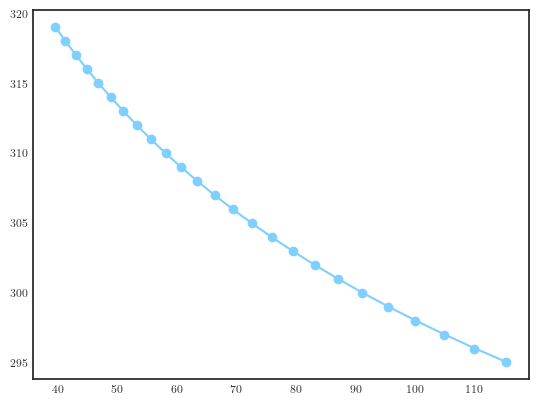

In [9]:
plt.scatter(R_cal, T_cal)
plt.plot(R_cal, func(R_cal, *args))

In [10]:
T = func(R, *args)-273

In [11]:
Q = 310*0.22*(T-T[0])                                   #calories
W = (4016e-3)*9.8*np.pi*(5e-2)*(vueltas-vueltas[0])      #Jules

In [12]:
def line(x, a, b):
    return a*x + b

In [13]:
args2, covs2 = curve_fit(line, W, Q)

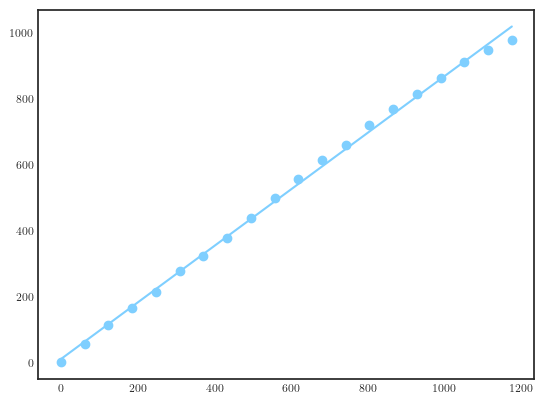

In [14]:
plt.scatter(W, Q)
plt.plot(W, line(W, *args2))

In [15]:
args2

array([ 0.85845196, 10.36466256])

In [16]:
T

array([23.08350181, 23.88378511, 24.76218784, 25.48747632, 26.19691556,
       27.14705356, 27.80004068, 28.63004677, 29.52492181, 30.40728152,
       31.24353313, 32.08685717, 32.74432551, 33.65694482, 34.33588654,
       35.00334206, 35.73118141, 36.44827962, 36.95424083, 37.43293359])

## Equivalente Eléctrico

In [17]:
df_cal = pd.read_csv('cal_term_100k.csv')
R_cal = np.array(df_cal['R 100k (kOhm)'])
T_cal = np.array(df_cal['T 100k (grados)'])+273

In [18]:
cal_args, cal_covs = curve_fit(func, R_cal, T_cal)

In [19]:
df2 = pd.read_csv('equivElectrico.csv')

In [20]:
df2

,t1,R1,t2,R2,t3,R3
0,0,112.0,0.0,111.6,0.0,94.5
1,10,111.9,30.0,108.6,30.0,88.1
2,20,111.7,60.0,105.6,60.0,81.2
3,30,111.6,90.0,102.6,90.0,75.6
4,40,111.4,120.0,99.7,120.0,70.5
...,...,...,...,...,...,...
71,1560,72.2,NaN,NaN,NaN,NaN
72,1620,71.1,NaN,NaN,NaN,NaN
73,1680,70.7,NaN,NaN,NaN,NaN
74,1740,69.5,NaN,NaN,NaN,NaN


In [21]:
# t (seconds)
t1 = np.array(df2['t1'])[df2['t1']>=0]
t2 = np.array(df2['t2'])[df2['t2']>=0]
t3 = np.array(df2['t3'])[df2['t3']>=0]

# R (kOhm)
R1 = np.array(df2['R1'][df2['R1']>=0])
R2 = np.array(df2['R2'][df2['R2']>=0])
R3 = np.array(df2['R3'][df2['R3']>=0])

In [22]:
M_Al = 48 # g
m_1, m_2, m_3 = 83, 130, 104    # g
V_1, V_2, V_3 = 5, 10, 15       # V
I_1, I_2, I_3 = 0.7, 1.4, 2.1   # A

In [23]:
times = [t1, t2, t3]
Resistances = [R1, R2, R3]
mases = [m_1, m_2, m_3]
voltages = [V_1, V_2, V_3]
currents = [I_1, I_2, I_3]
alpha = [.4, .6, 1]

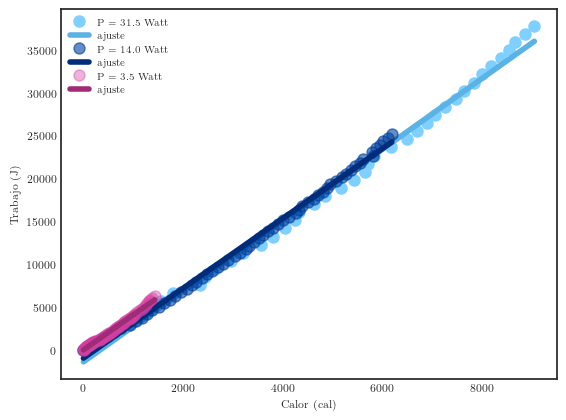

In [29]:
args = []
covs = []
for ii in range(2,-1,-1):
    work = voltages[ii] * currents[ii] * times[ii]  # Joules
    T = func(Resistances[ii], *cal_args) - 273
    Q = (1.5*mases[ii] + 0.25*M_Al) * (T - T[0])  # calories
    args_, covs_ = curve_fit(line, Q, work)
    args.append(args_)
    covs.append(covs_)
    plt.plot(Q, work, 'o', label=f'P = {currents[ii]*voltages[ii]} Watt', markersize=8, alpha = alpha[ii])
    plt.plot(Q, line(Q, *args_), label=f'ajuste', linewidth=4)

plt.xlabel('Calor (cal)')
plt.ylabel('Trabajo (J)')
plt.legend()

plt.savefig('calorTrabajo.png', dpi=300, bbox_inches='tight')

In [30]:
m = np.array(args)
m

array([[    4.12601834, -1388.70295727],
       [    4.06655015,  -950.95286281],
       [    4.08177223,     8.95556836]])

In [31]:
m.mean(axis=0), m.std(axis=0)

(array([   4.09144691, -776.90008391]),
 array([2.52232164e-02, 5.83714037e+02]))

In [27]:
dm = np.array(list(map(np.diag, covs)))
dm

array([[5.60817679e-03, 8.41657860e+04],
       [1.92047689e-03, 1.30142418e+04],
       [3.68964473e-03, 7.76394848e+02]])

In [28]:
np.sum(dm[:,0]**2)

4.875335657281212e-05